In [ ]:
version

               _                                          
platform       x86_64-pc-linux-gnu                        
arch           x86_64                                     
os             linux-gnu                                  
system         x86_64, linux-gnu                          
status         Patched                                    
major          4                                          
minor          2.2                                        
year           2022                                       
month          11                                         
day            10                                         
svn rev        83330                                      
language       R                                          
version.string R version 4.2.2 Patched (2022-11-10 r83330)
nickname       Innocent and Trusting                      

<h1> Archivo base configuración Google Colab </h1>

# Introduction to Statistical Analysis

---
* Data Set: _Pima_ from _R - library faraway_

## Description:
The National Institute of Diabetes and Digestive and Kidney Diseases conducted a study on 768 adult female Pima Indians living near Phoenix.

**Usage**

data(pima)

**Format**
The dataset contains the following variables

* pregnant: Number of times pregnant
* glucose: Plasma glucose concentration at 2 hours in an oral glucose tolerance test
* diastolic: Diastolic blood pressure (mm Hg)
* triceps: Triceps skin fold thickness (mm)
* insulin: 2-Hour serum insulin (mu U/ml)
* bmi: Body mass index (weight in kg/(height in metres squared))
* diabetes: Diabetes pedigree function
* age: Age (years)
* test: test whether the patient shows signs of diabetes (coded 0 if negative, 1 if positive)

**Source**

The data may be obtained from UCI Repository of machine learning databases at http://archive.ics.uci.edu/ml/

---

In [ ]:
# We need
install.packages('faraway')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘lme4’




In [ ]:
# alternatively
install.packages(c('ggplot2','ggExtra','ggpubr'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘htmlwidgets’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘htmltools’, ‘sourcetools’, ‘later’, ‘promises’, ‘corrplot’, ‘car’, ‘colourpicker’, ‘miniUI’, ‘shiny’, ‘shinyjs’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [ ]:
# format graphic space
library(repr)
options(repr.plot.width=8, repr.plot.height=8)

## First, you should know

In [ ]:
data(pima, package='faraway')
head(pima)
tail(pima)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
763,9,89,62,0,0,22.5,0.142,33,0
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.340,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1
768,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# summary data
summary(pima)

    pregnant         glucose        diastolic         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           bmi           diabetes           age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00  
      test      
 Min.   :0.000  
 1st Qu.:0.000  
 Median :0.000  
 

In [ ]:
# We change the variable from quantitative to qualitative (factor into R)
pima$test <- factor(pima$test)
levels(pima$test) <- c("negative","positive")
summary(pima)

    pregnant         glucose        diastolic         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           bmi           diabetes           age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00  
       test    
 negative:500  
 positive:268  
               
     

In [ ]:
# We change zeros to N.A.
pima$diastolic[pima$diastolic == 0] <- NA
pima$glucose[pima$glucose == 0] <- NA
pima$triceps[pima$triceps == 0] <- NA
pima$insulin[pima$insulin == 0] <- NA
pima$bmi[pima$bmi == 0] <- NA

In [ ]:
summary(pima)

    pregnant         glucose        diastolic         triceps     
 Min.   : 0.000   Min.   : 44.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:22.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :29.00  
 Mean   : 3.845   Mean   :121.7   Mean   : 72.41   Mean   :29.15  
 3rd Qu.: 6.000   3rd Qu.:141.0   3rd Qu.: 80.00   3rd Qu.:36.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
                  NA's   :5       NA's   :35       NA's   :227    
    insulin            bmi           diabetes           age       
 Min.   : 14.00   Min.   :18.20   Min.   :0.0780   Min.   :21.00  
 1st Qu.: 76.25   1st Qu.:27.50   1st Qu.:0.2437   1st Qu.:24.00  
 Median :125.00   Median :32.30   Median :0.3725   Median :29.00  
 Mean   :155.55   Mean   :32.46   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:190.00   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.00   Max.   :67.10   Max.   :2.4200   Max.   :81.

## What’s Happening? Plotting Data
### Bar Chart

**Way 1: usign `barplot`**
1. Select the variable
2. Make a Table `table(x)`
3. Plot table

In [ ]:
prop.table(table(pima$test))


 negative  positive 
0.6510417 0.3489583 

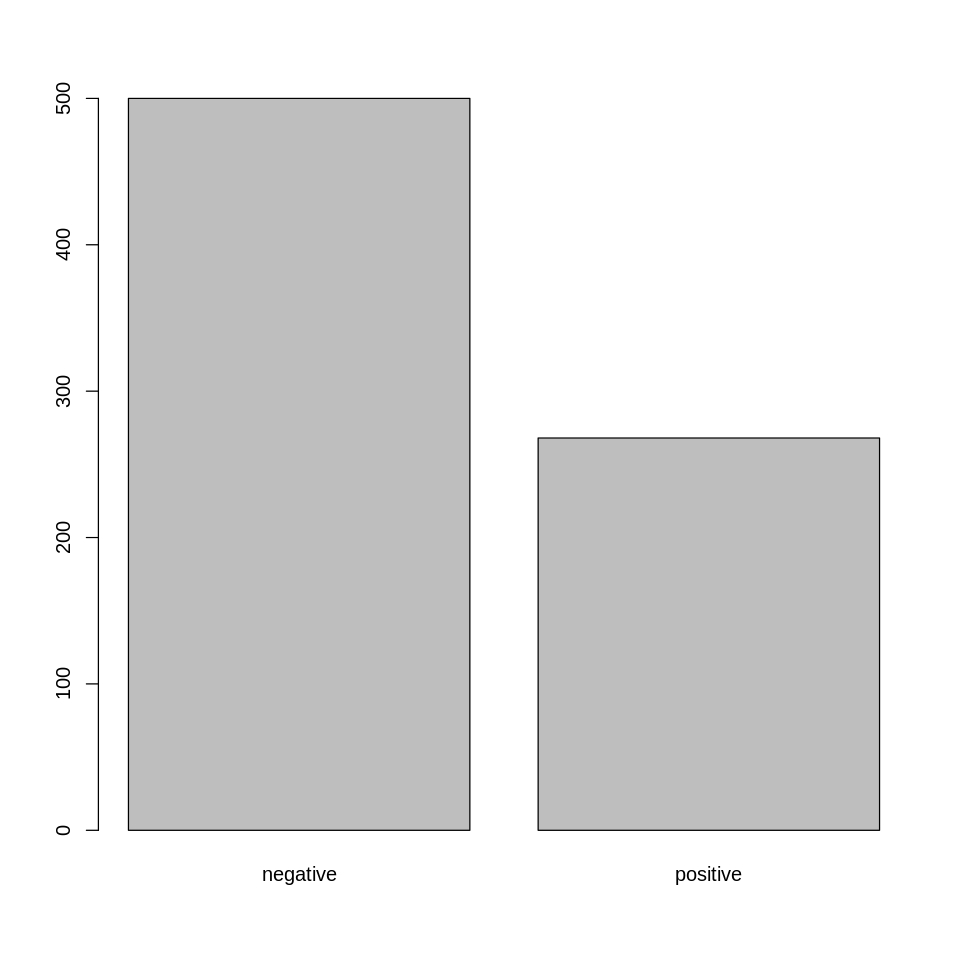

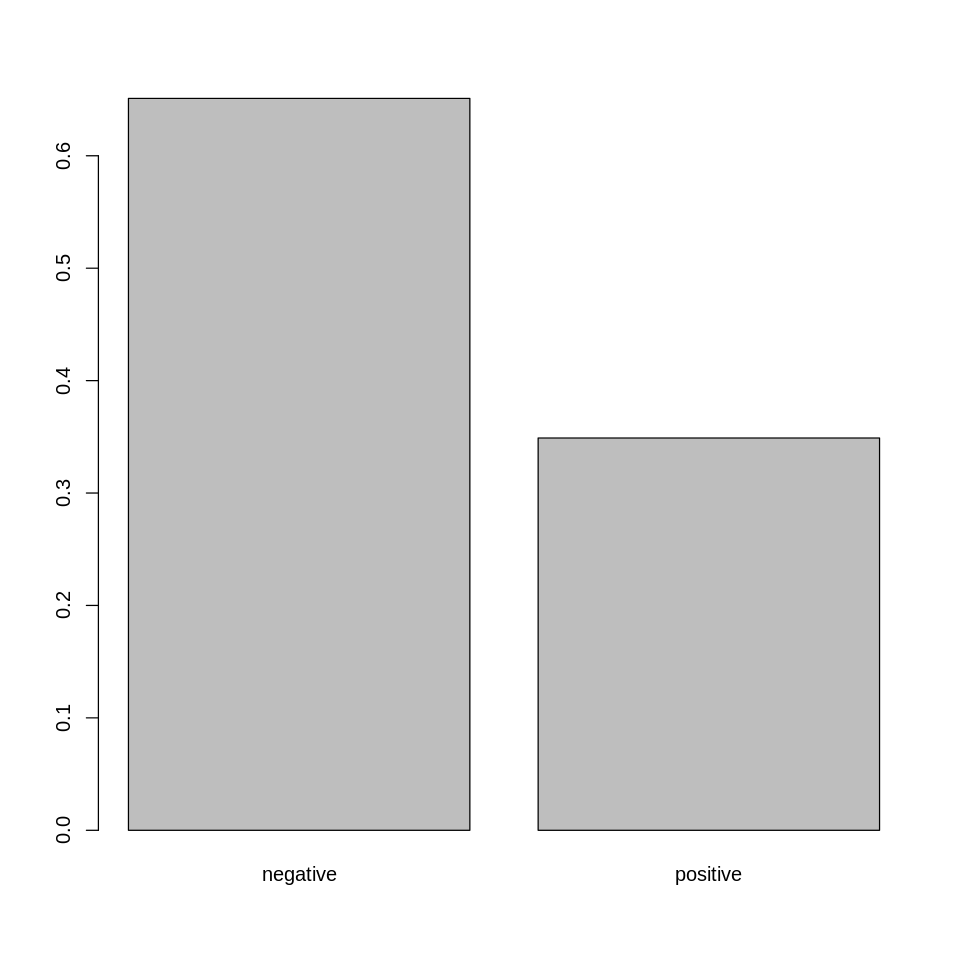

In [ ]:
barplot(table(pima$test))
barplot(prop.table(table(pima$test)))

In [ ]:
# We are going to create a new variable from another variable
# using age
with(pima, factor(cut(age,breaks = c(20,25,30,35,40,45,50,81))))

[1] (45,50] (30,35] (30,35] (20,25] (30,35] (25,30] (25,30] (25,30] (50,81]
 [10] (50,81] (25,30] (30,35] (50,81] (50,81] (50,81] (30,35] (30,35] (30,35]
 [19] (30,35] (30,35] (25,30] (45,50] (40,45] (25,30] (50,81] (40,45] (40,45]
 [28] (20,25] (50,81] (35,40] (50,81] (25,30] (20,25] (25,30] (40,45] (30,35]
 [37] (30,35] (45,50] (25,30] (50,81] (25,30] (35,40] (45,50] (50,81] (35,40]
 [46] (20,25] (25,30] (20,25] (30,35] (20,25] (20,25] (25,30] (25,30] (50,81]
 [55] (40,45] (20,25] (40,45] (30,35] (40,45] (20,25] (20,25] (35,40] (35,40]
 [64] (20,25] (40,45] (30,35] (35,40] (50,81] (20,25] (25,30] (25,30] (25,30]
 [73] (40,45] (20,25] (20,25] (20,25] (40,45] (25,30] (25,30] (20,25] (20,25]
 [82] (20,25] (35,40] (20,25] (35,40] (25,30] (40,45] (25,30] (40,45] (20,25]
 [91] (20,25] (30,35] (40,45] (50,81] (20,25] (35,40] (20,25] (20,25] (20,25]
[100] (30,35] (30,35] (20,25] (20,25] (20,25] (25,30] (20,25] (25,30] (35,40]
[109] (20,25] (20,25] (20,25] (45,50] (20,25] (20,25] (35,40] (50,81] (35,40]
[118] (20,25] (20,25] (20,25] (20,25] (20,25] (20,25] (50,81] (20,25] (25,30]
[127] (25,30] (20,25] (35,40] (50,81] (30,35] (30,35] (25,30] (35,40] (25,30]
[136] (30,35] (20,25] (20,25] (25,30] (25,30] (50,81] (35,40] (20,25] (40,45]
[145] (20,25] (20,25] (40,45] (30,35] (50,81] (20,25] (20,25] (35,40] (40,45]
[154] (20,25] (40,45] (35,40] (20,25] (20,25] (20,25] (45,50] (35,40] (40,45]
[163] (25,30] (20,25] (30,35] (40,45] (20,25] (30,35] (25,30] (25,30] (35,40]
[172] (25,30] (20,25] (20,25] (30,35] (35,40] (40,45] (25,30] (45,50] (35,40]
[181] (30,35] (20,25] (20,25] (25,30] (35,40] (40,45] (50,81] (30,35] (30,35]
[190] (20,25] (20,25] (35,40] (35,40] (35,40] (40,45] (25,30] (20,25] (20,25]
[199] (25,30] (25,30] (20,25] (25,30] (30,35] (25,30] (50,81] (25,30] (50,81]
[208] (50,81] (20,25] (40,45] (20,25] (20,25] (50,81] (20,25] (35,40] (35,40]
[217] (20,25] (30,35] (30,35] (40,45] (20,25] (50,81] (35,40] (50,81] (25,30]
[226] (20,25] (25,30] (20,25] (30,35] (20,25] (20,25] (45,50] (20,25] (25,30]
[235] (20,25] (25,30] (50,81] (20,25] (30,35] (25,30] (20,25] (20,25] (20,25]
[244] (30,35] (25,30] (45,50] (40,45] (20,25] (30,35] (20,25] (40,45] (25,30]
[253] (20,25] (20,25] (40,45] (20,25] (25,30] (20,25] (20,25] (50,81] (30,35]
[262] (25,30] (20,25] (50,81] (30,35] (40,45] (20,25] (20,25] (20,25] (25,30]
[271] (35,40] (20,25] (35,40] (20,25] (50,81] (20,25] (25,30] (20,25] (50,81]
[280] (20,25] (25,30] (35,40] (35,40] (45,50] (50,81] (50,81] (30,35] (25,30]
[289] (25,30] (30,35] (20,25] (20,25] (30,35] (20,25] (50,81] (25,30] (25,30]
[298] (20,25] (45,50] (50,81] (25,30] (20,25] (30,35] (25,30] (35,40] (25,30]
[307] (45,50] (20,25] (20,25] (25,30] (40,45] (20,25] (25,30] (20,25] (40,45]
[316] (25,30] (25,30] (25,30] (25,30] (50,81] (30,35] (20,25] (35,40] (40,45]
[325] (20,25] (20,25] (25,30] (35,40] (20,25] (35,40] (45,50] (20,25] (40,45]
[334] (40,45] (20,25] (25,30] (40,45] (40,45] (30,35] (40,45] (20,25] (35,40]
[343] (20,25] (30,35] (50,81] (45,50] (20,25] (20,25] (25,30] (35,40] (25,30]
[352] (25,30] (45,50] (20,25] (20,25] (45,50] (25,30] (40,45] (45,50] (25,30]
[361] (25,30] (50,81] (50,81] (50,81] (25,30] (25,30] (25,30] (20,25] (20,25]
[370] (40,45] (20,25] (20,25] (20,25] (20,25] (25,30] (50,81] (20,25] (20,25]
[379] (30,35] (30,35] (20,25] (20,25] (20,25] (20,25] (20,25] (20,25] (30,35]
[388] (40,45] (50,81] (25,30] (40,45] (25,30] (20,25] (35,40] (30,35] (20,25]
[397] (35,40] (20,25] (20,25] (20,25] (30,35] (50,81] (30,35] (35,40] (40,45]
[406] (25,30] (45,50] (20,25] (35,40] (25,30] (25,30] (20,25] (20,25] (20,25]
[415] (20,25] (20,25] (20,25] (35,40] (25,30] (25,30] (25,30] (20,25] (20,25]
[424] (20,25] (35,40] (30,35] (20,25] (35,40] (25,30] (40,45] (20,25] (35,40]
[433] (20,25] (25,30] (35,40] (25,30] (40,45] (25,30] (20,25] (30,35] (40,45]
[442] (20,25] (20,25] (30,35] (25,30] (20,25] (25,30] (25,30] (20,25] (25,30]
[451] (20,25] (20,25] (20,25] (50,81] (20,25] (35,40] (50,81] (20,25] (50,81]
[460] (50,81] (45,50] (2

In [ ]:
pima$age2 <-  with(pima, factor(cut(age,breaks = c(20,25,30,35,40,45,50,81))))
summary(pima)

    pregnant         glucose        diastolic         triceps     
 Min.   : 0.000   Min.   : 44.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:22.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :29.00  
 Mean   : 3.845   Mean   :121.7   Mean   : 72.41   Mean   :29.15  
 3rd Qu.: 6.000   3rd Qu.:141.0   3rd Qu.: 80.00   3rd Qu.:36.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
                  NA's   :5       NA's   :35       NA's   :227    
    insulin            bmi           diabetes           age       
 Min.   : 14.00   Min.   :18.20   Min.   :0.0780   Min.   :21.00  
 1st Qu.: 76.25   1st Qu.:27.50   1st Qu.:0.2437   1st Qu.:24.00  
 Median :125.00   Median :32.30   Median :0.3725   Median :29.00  
 Mean   :155.55   Mean   :32.46   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:190.00   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.00   Max.   :67.10   Max.   :2.4200   Max.   :81.

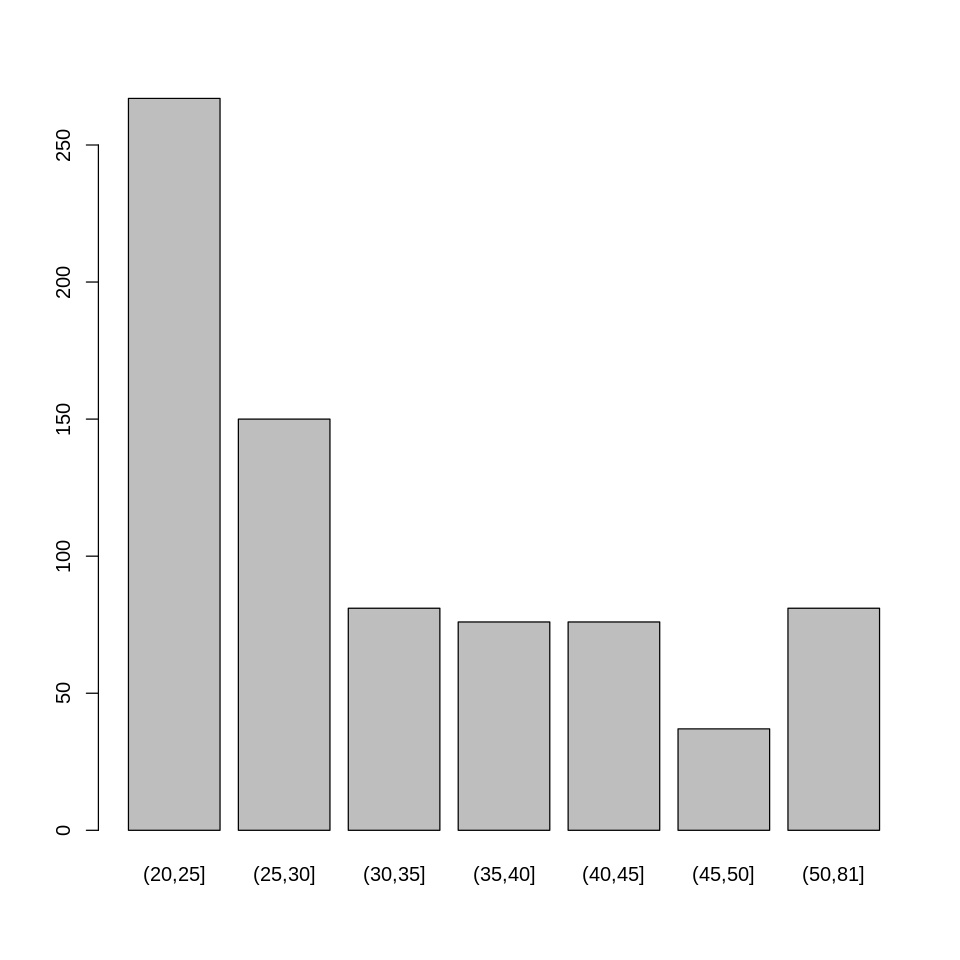

In [ ]:
barplot(table(pima$age2))

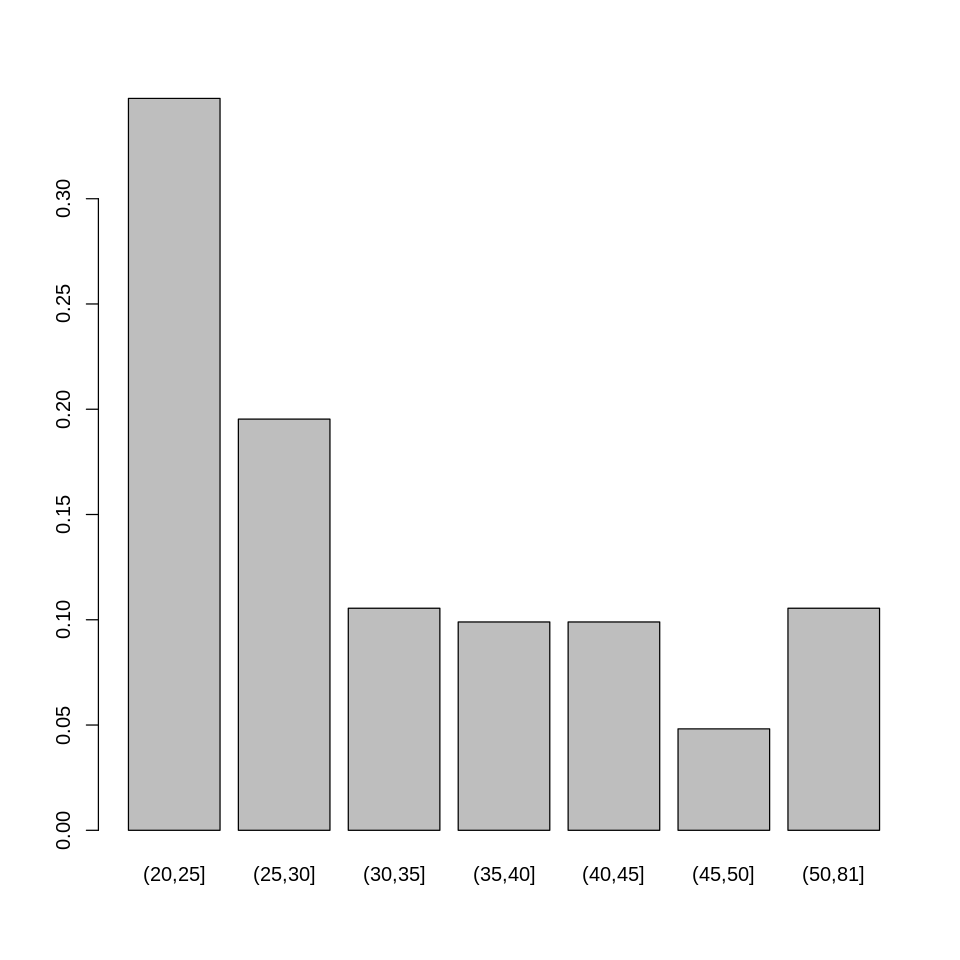

In [ ]:
barplot(prop.table(table(pima$age2)))

**Way 2: usign `ggplot` plus `geom_bar`**
1. Select the variables
2. Assign aesthetics

In [ ]:
# we need the library ggplot2
library(ggplot2)

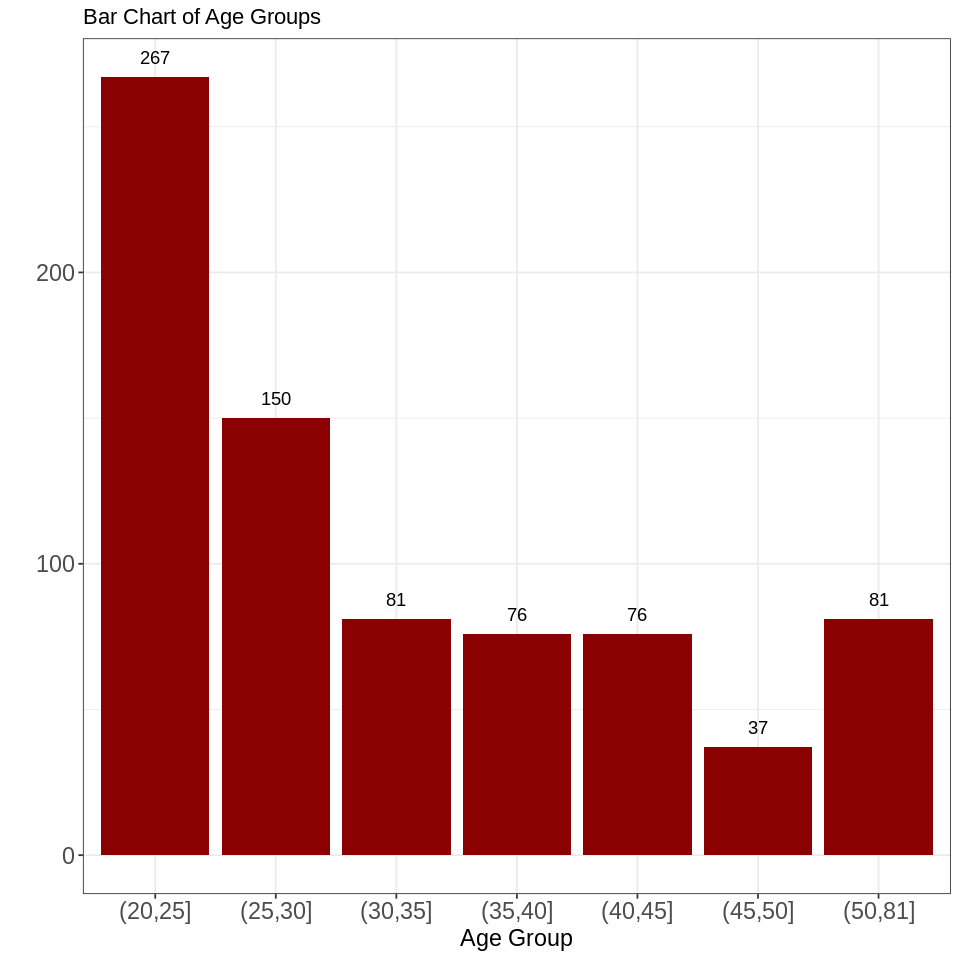

In [ ]:
# using data and assign aesthetics
ggplot(data = pima, aes(x = age2)) + geom_bar(stat = 'count', fill = 'darkred') + theme_bw() +
labs(x = 'Age Group', y = '') + ggtitle('Bar Chart of Age Groups') +
geom_text(stat = 'count', aes(label=after_stat(count)), vjust=-1) +
theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none') 

Warning message:
“The dot-dot notation (`..prop..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(prop)` instead.”


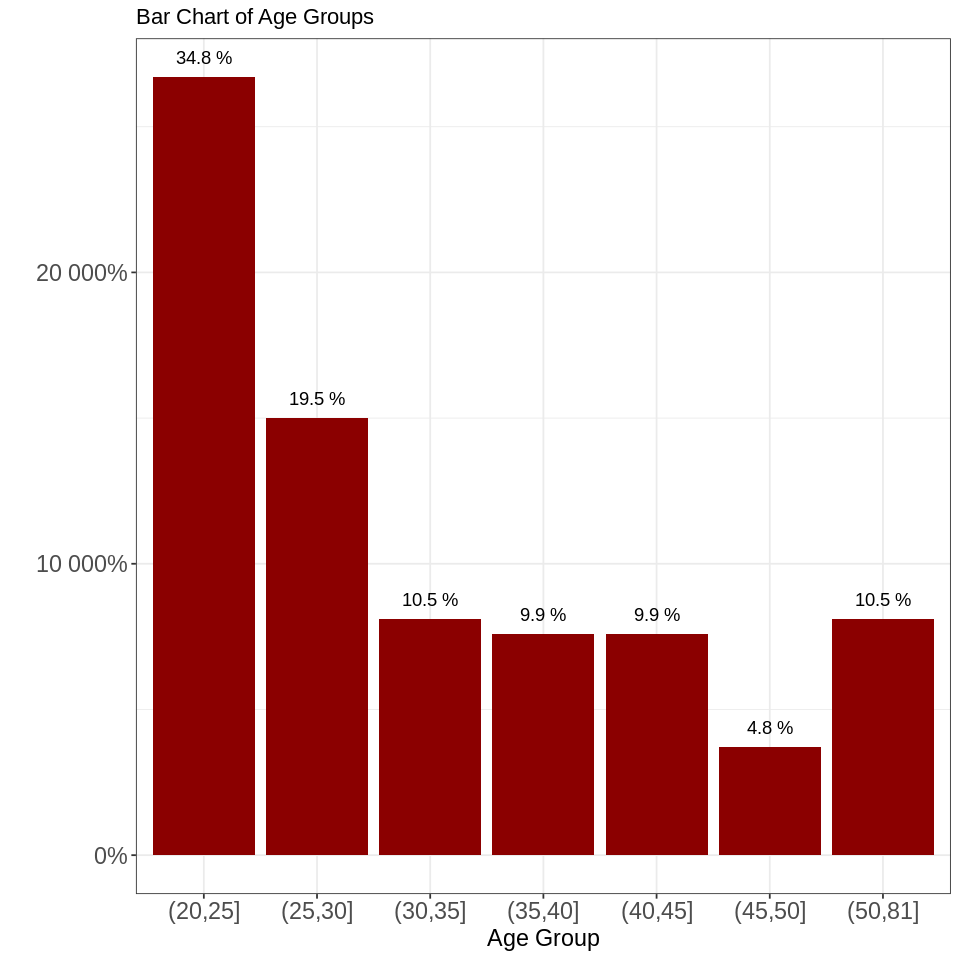

In [ ]:
ggplot(data = pima, aes(x = age2)) + geom_bar(stat = 'count', fill = 'darkred') + theme_bw() +
labs(x = 'Age Group', y = '') + ggtitle('Bar Chart of Age Groups') +
geom_text(aes(label = paste(round(..prop..*100,1),'%'), group = 1), stat = "count", vjust = -1) +
scale_y_continuous(labels=scales::percent)  +
theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none') 

## Histogram

**Way 1: usign `hist`**
1. Select the variable
2. Make a Histogram `hist(x)`

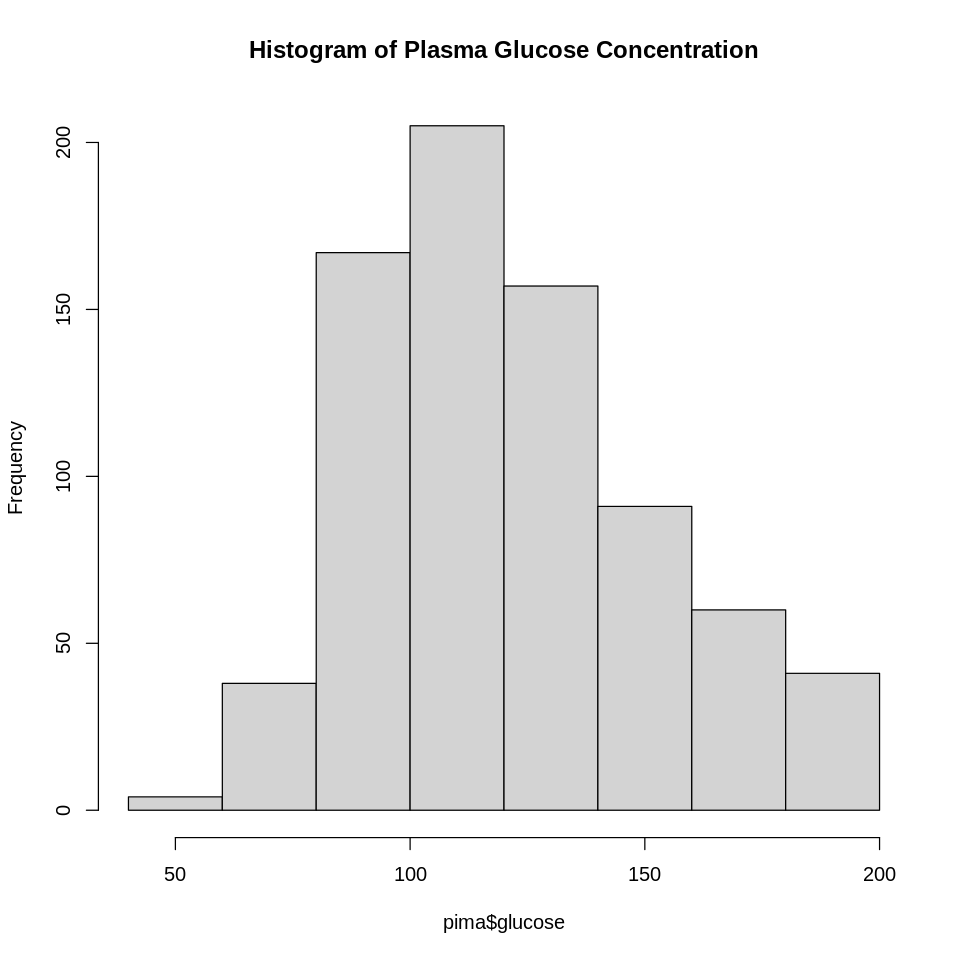

In [ ]:
hist(pima$glucose, main = 'Histogram of Plasma Glucose Concentration')

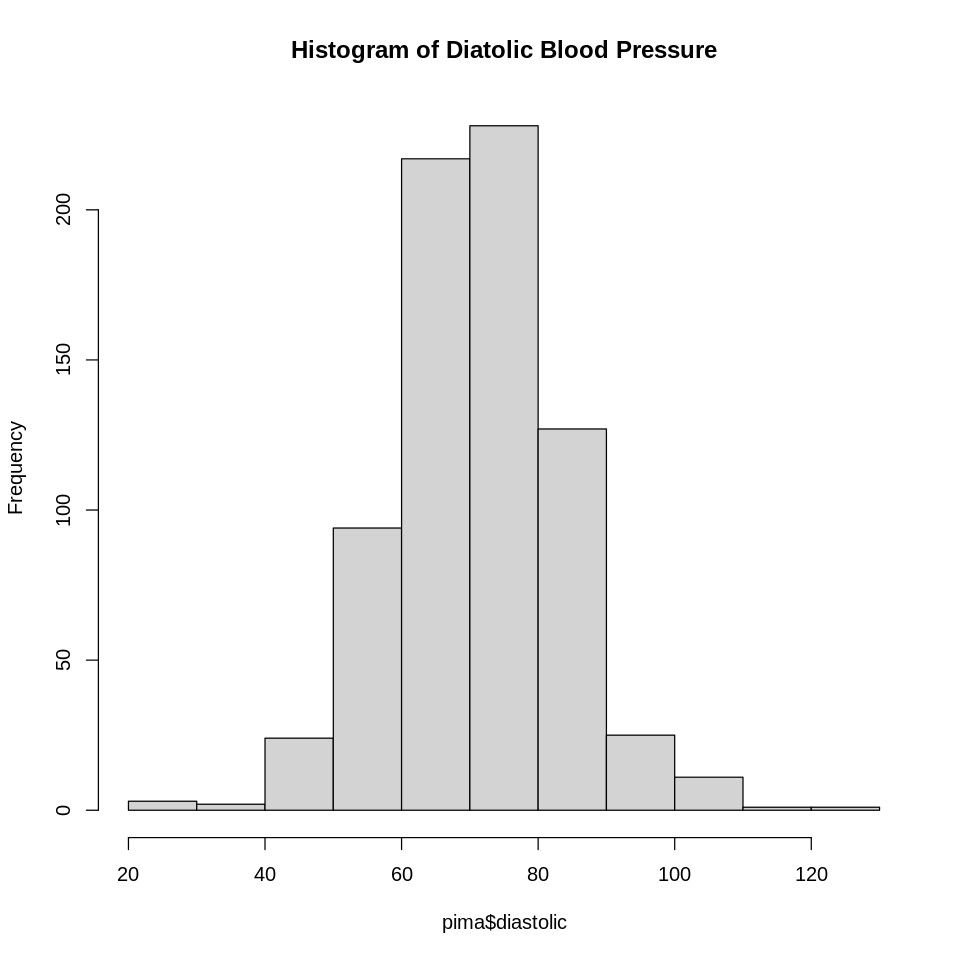

In [ ]:
hist(pima$diastolic, main = 'Histogram of Diatolic Blood Pressure')

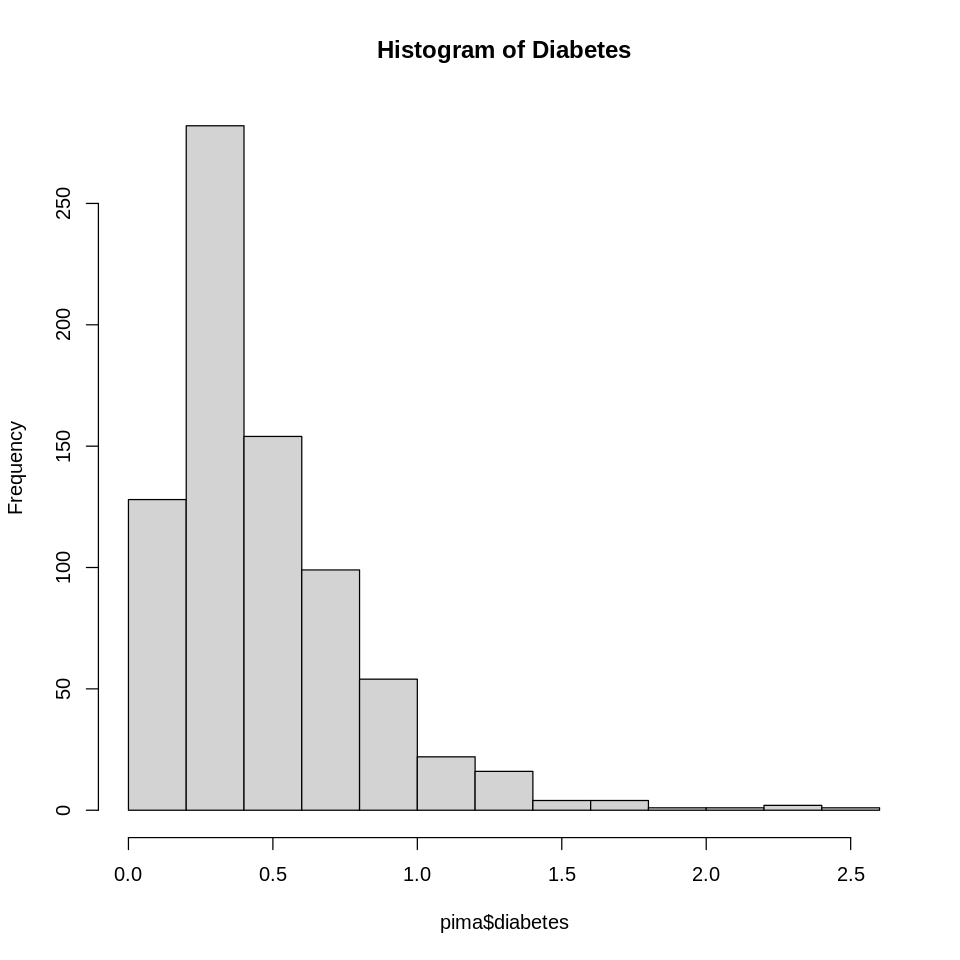

In [ ]:
hist(pima$diabetes, main = 'Histogram of Diabetes')

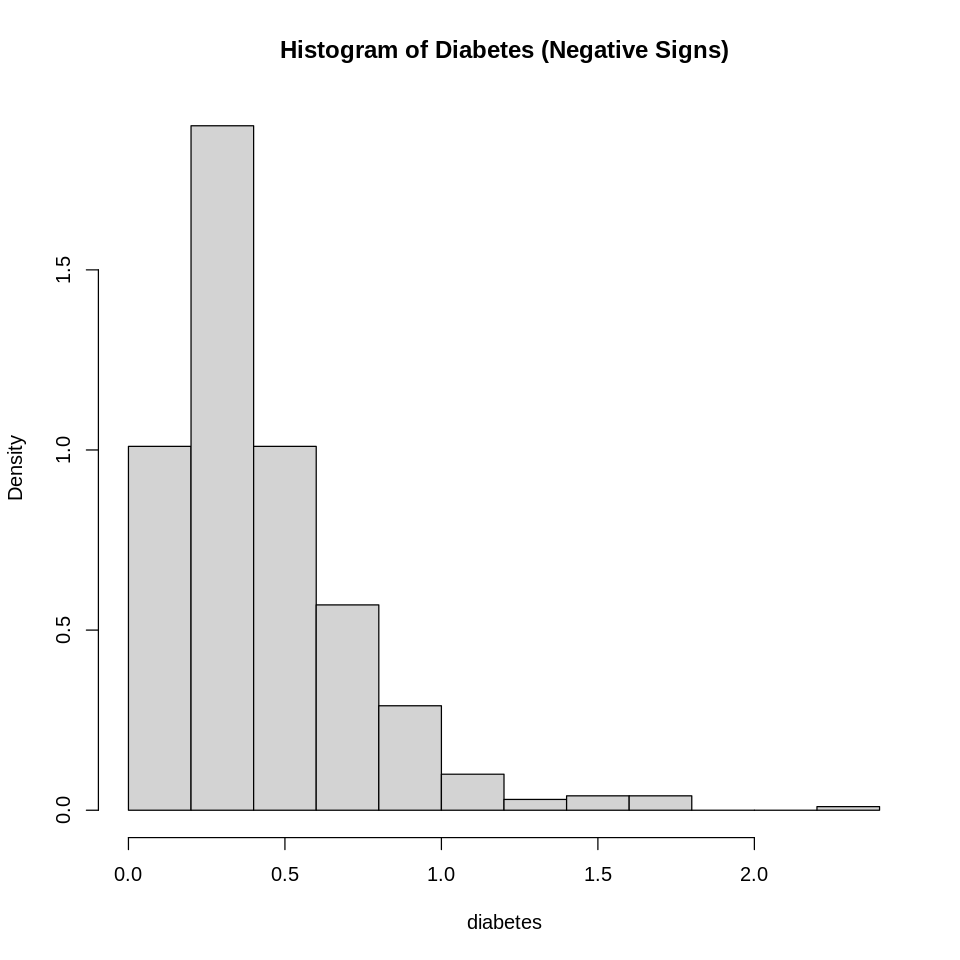

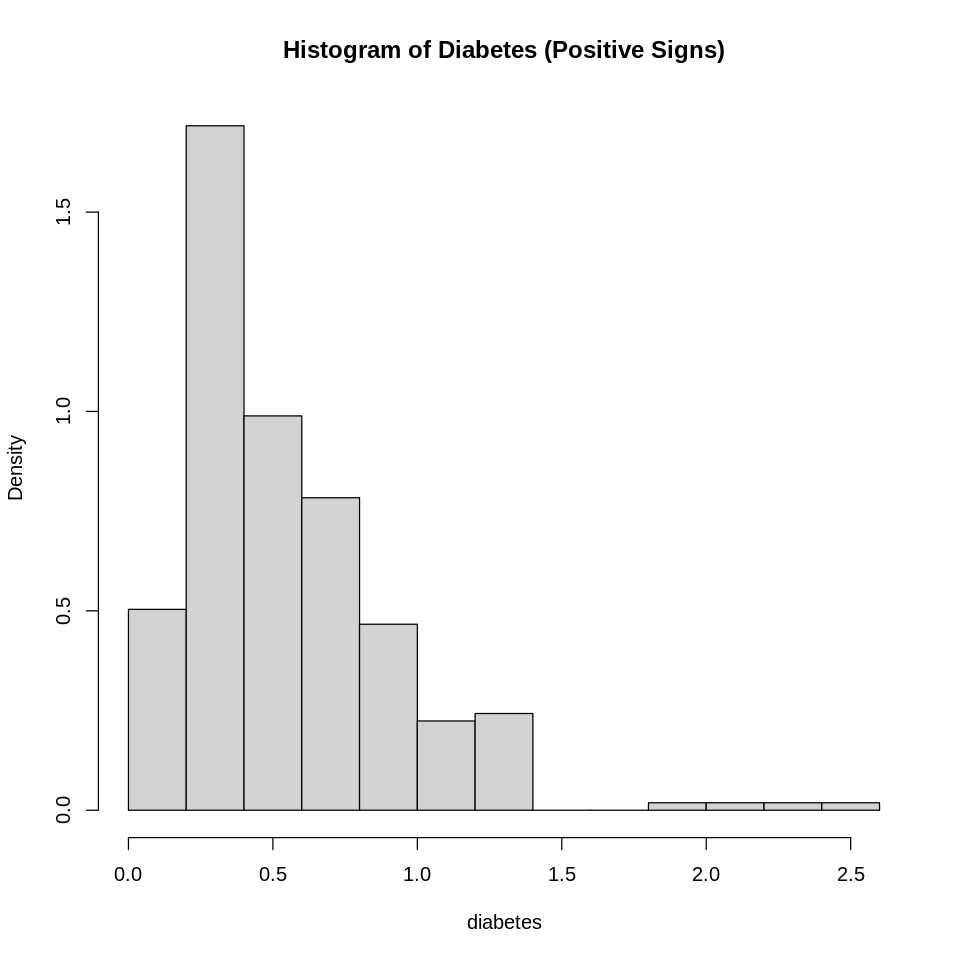

In [ ]:
# Conditional Histograms
with(pima[pima$test=='negative',], hist(diabetes, freq = F, main = 'Histogram of Diabetes (Negative Signs)'))
with(pima[pima$test=='positive',], hist(diabetes, freq = F, main = 'Histogram of Diabetes (Positive Signs)'))

**Way 2: usign `ggplot` plus `geom_histogram`**
1. Select the variables
2. Assign aesthetics

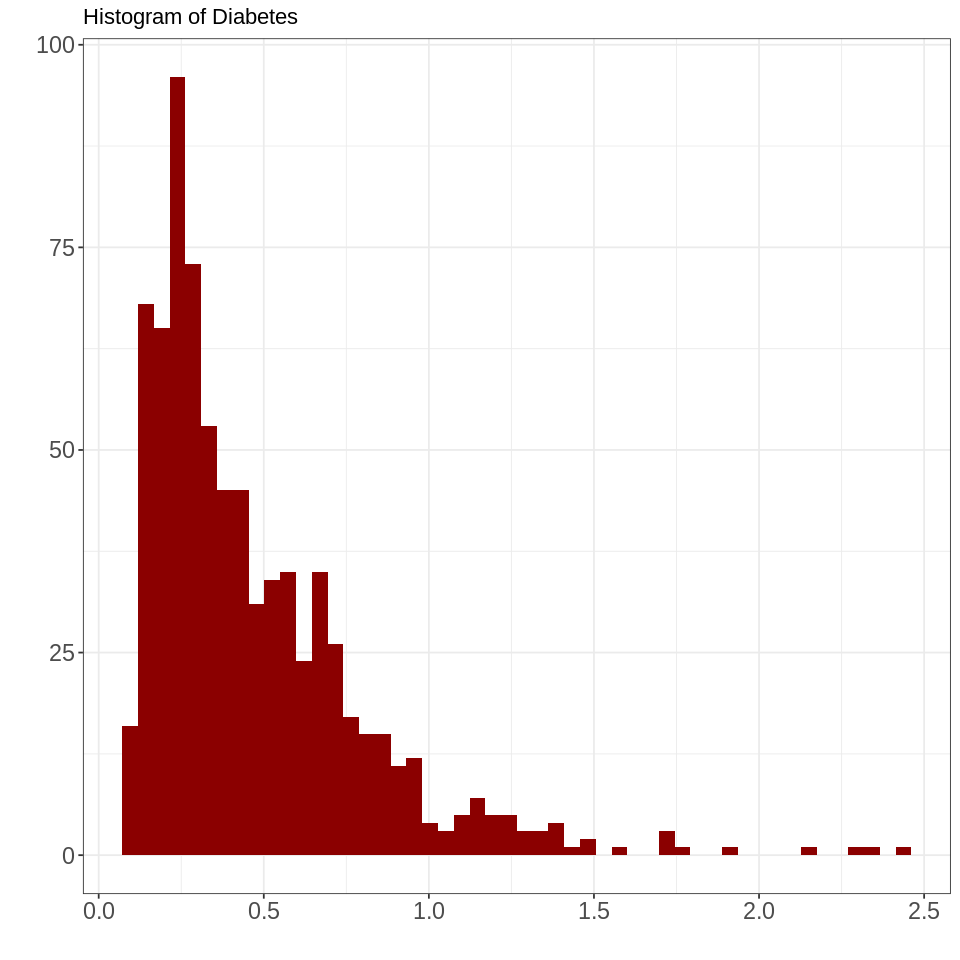

In [ ]:
ggplot(data = pima, aes(x = diabetes)) + geom_histogram(fill = 'darkred', bins = 50) +
theme_bw() + labs(x = '', y = '') + ggtitle('Histogram of Diabetes')  +
theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none') 

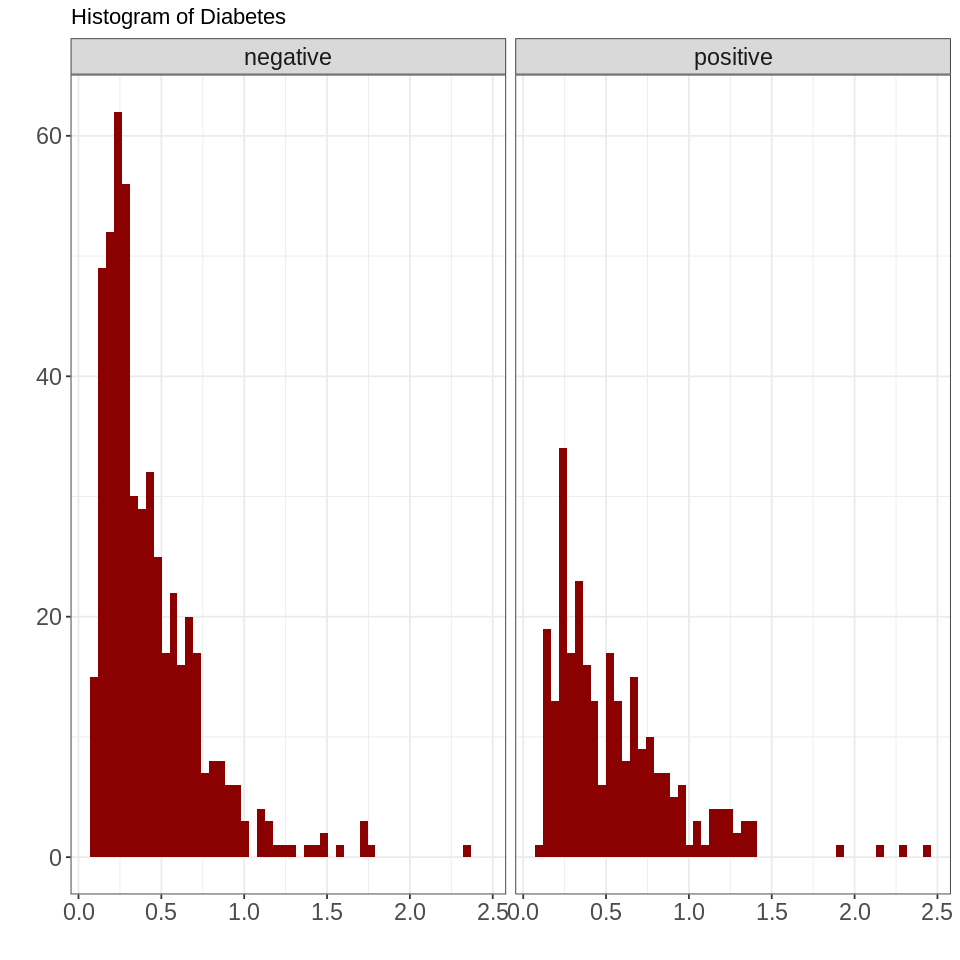

In [ ]:
ggplot(data = pima, aes(x = diabetes)) + geom_histogram(fill = 'darkred', bins = 50) +
theme_bw() + facet_wrap(~test) + labs(x = '', y = '') + ggtitle('Histogram of Diabetes') +
theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none') 

## Summarizing 1D data

* Mean
* Starndard Deviation
* Variance
* Median
* Quartile
* Percentile
* Interquantile Range

1. Select variable
2. Calculate the measure

In [ ]:
# mean
mean(pima$diabetes)

[1] 0.4718763

In [ ]:
# standard deviation
sd(pima$diabetes)

[1] 0.3313286

In [ ]:
# variance
var(pima$diabetes)

[1] 0.1097786

In [ ]:
# median
median(pima$diabetes)

[1] 0.3725

In [ ]:
# quartiles
data.frame(quantile(pima$age))

,quantile.pima.age.
,<dbl>
0%,21
25%,24
50%,29
75%,41
100%,81


In [ ]:
# percentile
quantile(pima$age,0.30)

30% 
 25

In [ ]:
# interquartile range
IQR(pima$age)

[1] 17

In [ ]:
summary(pima)

    pregnant         glucose        diastolic         triceps     
 Min.   : 0.000   Min.   : 44.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:22.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :29.00  
 Mean   : 3.845   Mean   :121.7   Mean   : 72.41   Mean   :29.15  
 3rd Qu.: 6.000   3rd Qu.:141.0   3rd Qu.: 80.00   3rd Qu.:36.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
                  NA's   :5       NA's   :35       NA's   :227    
    insulin            bmi           diabetes           age       
 Min.   : 14.00   Min.   :18.20   Min.   :0.0780   Min.   :21.00  
 1st Qu.: 76.25   1st Qu.:27.50   1st Qu.:0.2437   1st Qu.:24.00  
 Median :125.00   Median :32.30   Median :0.3725   Median :29.00  
 Mean   :155.55   Mean   :32.46   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:190.00   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.00   Max.   :67.10   Max.   :2.4200   Max.   :81.

In [ ]:
as.data.frame(sapply(pima[,-c(9,10)], sd, na.rm = TRUE))

,"sapply(pima[, -c(9, 10)], sd, na.rm = TRUE)"
,<dbl>
pregnant,3.3695781
glucose,30.5356411
diastolic,12.3821582
triceps,10.4769824
insulin,118.7758552
bmi,6.9249883
diabetes,0.3313286
age,11.7602315


In [ ]:
as.data.frame(sapply(pima[,1:8], var, na.rm = TRUE))

,"sapply(pima[, 1:8], var, na.rm = TRUE)"
,<dbl>
pregnant,1.135406e+01
glucose,9.324254e+02
diastolic,1.533178e+02
triceps,1.097672e+02
insulin,1.410770e+04
bmi,4.795546e+01
diabetes,1.097786e-01
age,1.383030e+02


In [ ]:
as.data.frame(sapply(pima[,-c(9,10)], IQR, na.rm = TRUE))

,"sapply(pima[, -c(9, 10)], IQR, na.rm = TRUE)"
,<dbl>
pregnant,5.0000
glucose,42.0000
diastolic,16.0000
triceps,14.0000
insulin,113.7500
bmi,9.1000
diabetes,0.3825
age,17.0000


## Plots and Summaries

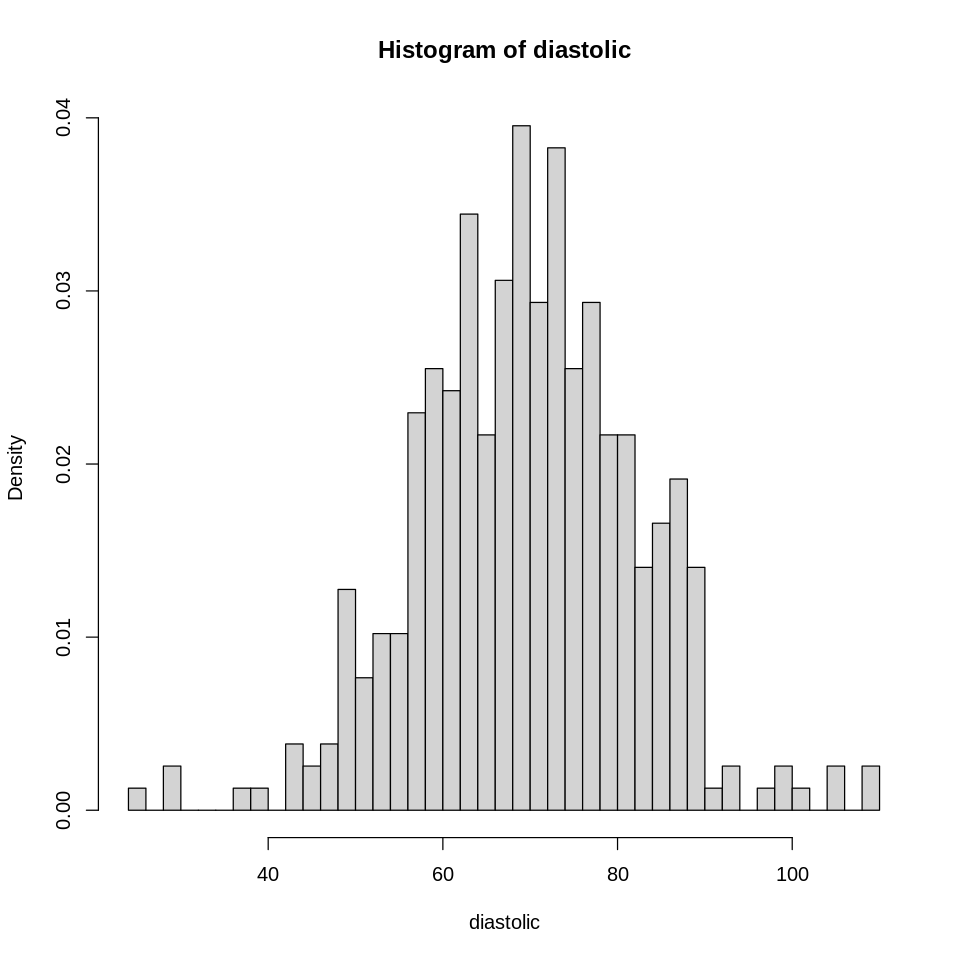

In [ ]:
with(na.omit(pima),
hist(diastolic, breaks = 50, freq = F))

In [ ]:
dim(pima)
pima2 <- na.omit(pima)
dim(pima2)

[1] 768  10

[1] 392  10

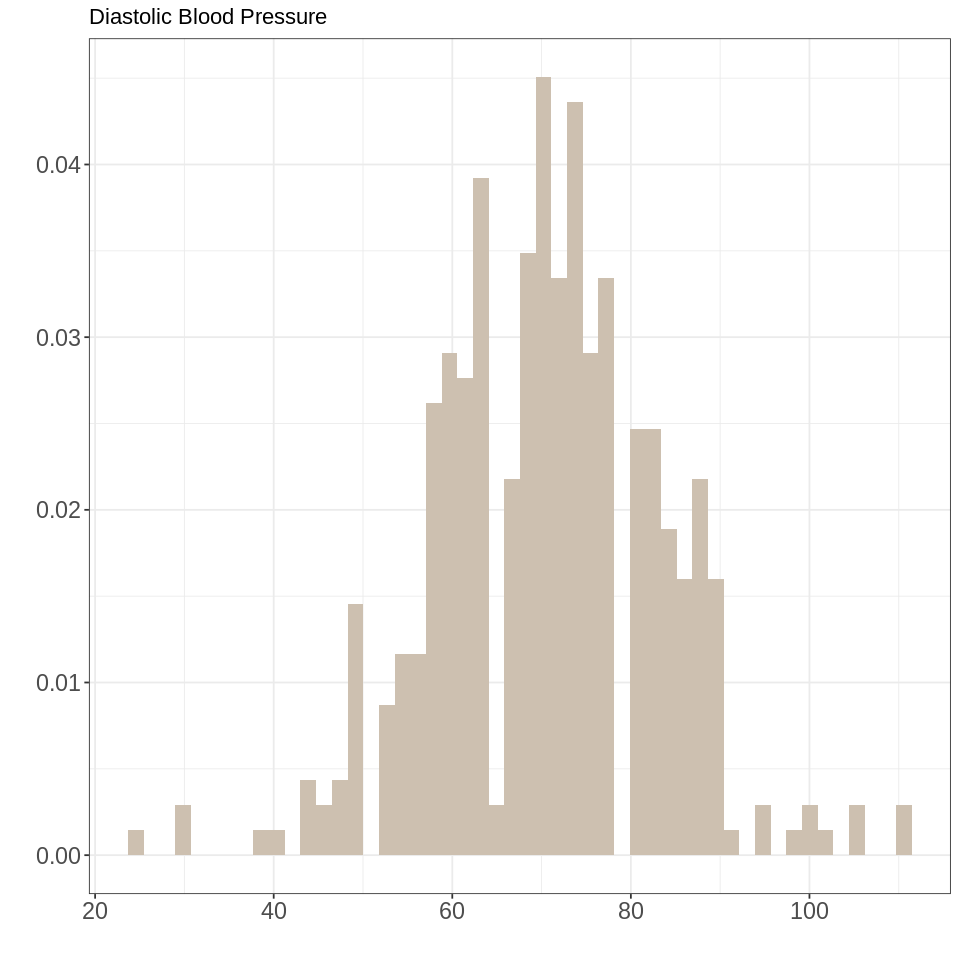

In [ ]:
pima2 <- na.omit(pima)
ggplot(data = pima2, aes(x = diastolic))  + 
  geom_histogram(aes(y=..density..), bins = 50, fill = 'antiquewhite3') +
  #geom_density(size = 1) +
  #geom_vline(xintercept = mean(pima2$diastolic), size = 1, linetype = "dashed") +
  #geom_vline(xintercept = median(pima2$diastolic), size = 1, linetype = "dotted") +
  #geom_vline(xintercept = quantile(pima2$diastolic,0.25), size = 0.5) +
  #geom_vline(xintercept = quantile(pima2$diastolic,0.75), size = 0.5) + 
  labs(x = '', y = '', fill = '') + theme_bw()+ theme(legend.position="bottom") +
  ggtitle('Diastolic Blood Pressure') +
theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none') 

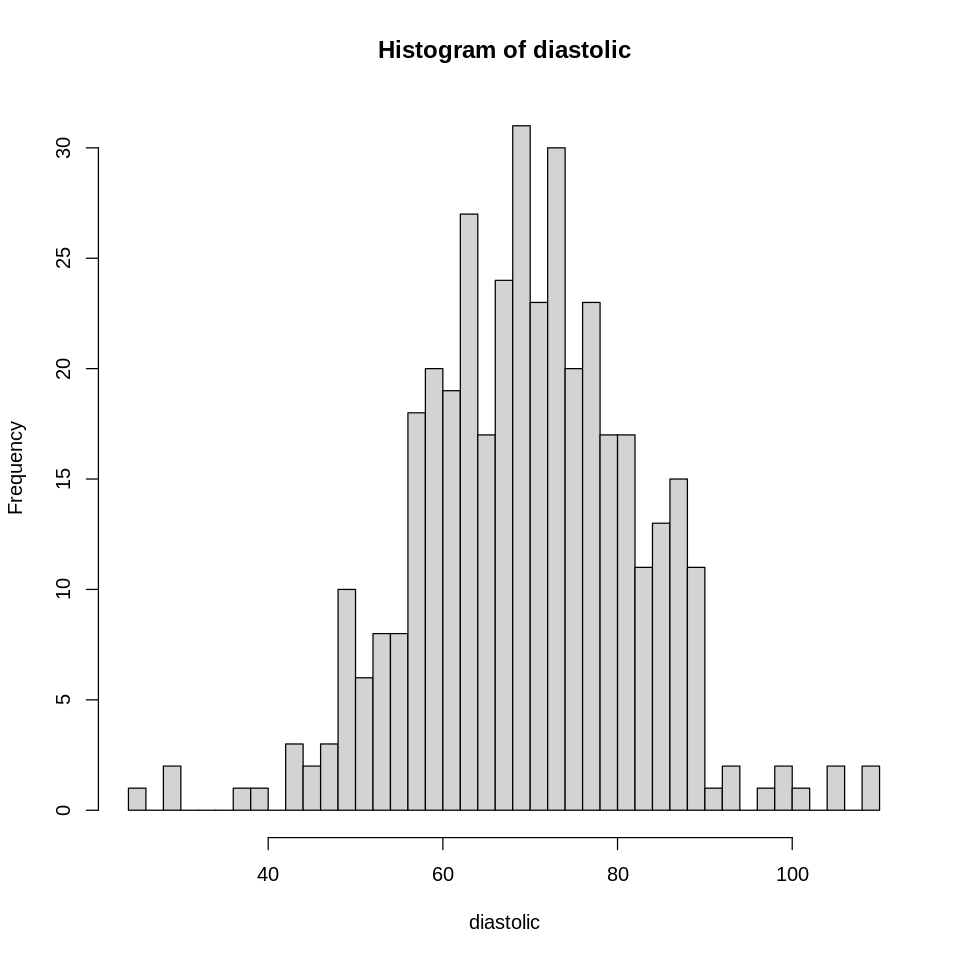

In [ ]:
with(pima2, hist(diastolic, breaks = 50))

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


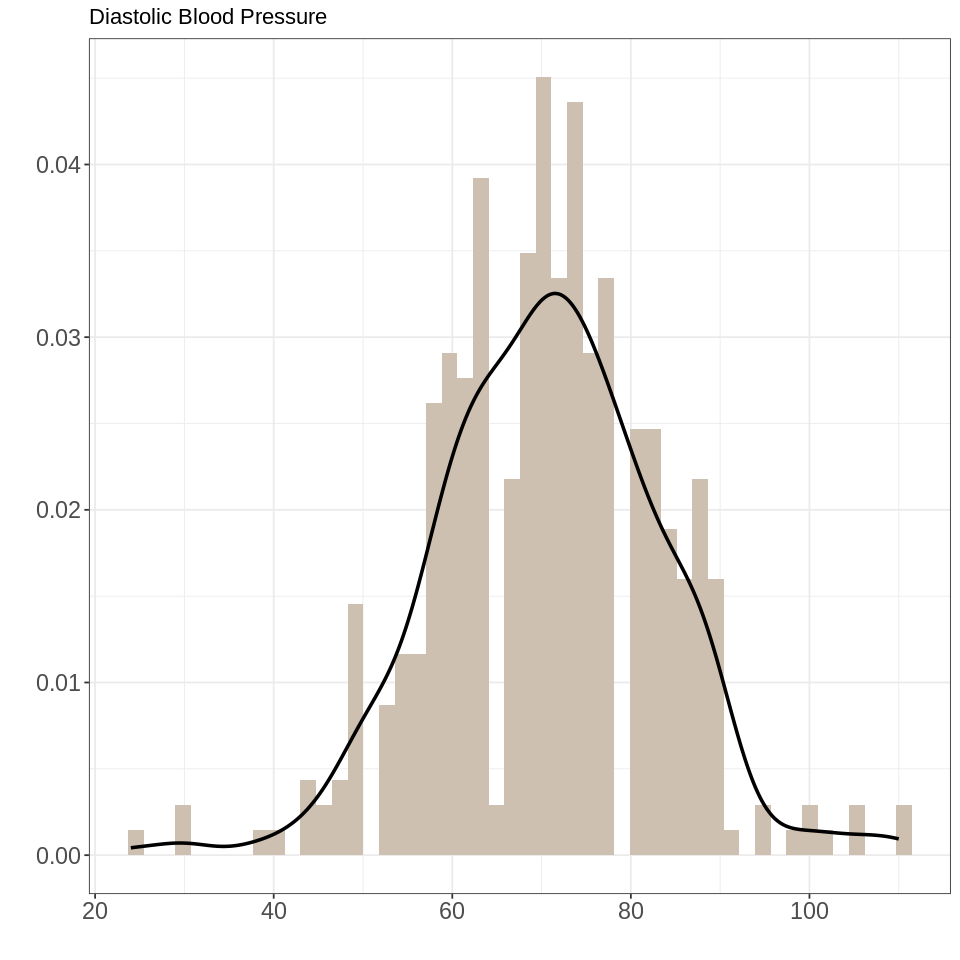

In [ ]:
ggplot(data = pima2, aes(x = diastolic))  + 
  geom_histogram(aes(y=..density..), bins = 50, fill = 'antiquewhite3') +
  geom_density(size = 1) +
  #geom_vline(xintercept = mean(pima2$diastolic), size = 1, linetype = "dashed") +
  #geom_vline(xintercept = median(pima2$diastolic), size = 1, linetype = "dotted") +
  #geom_vline(xintercept = quantile(pima2$diastolic,0.25), size = 0.5) +
  #geom_vline(xintercept = quantile(pima2$diastolic,0.75), size = 0.5) + 
  labs(x = '', y = '', fill = '') + theme_bw()+ theme(legend.position="bottom") +
  ggtitle('Diastolic Blood Pressure') +
theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none') 

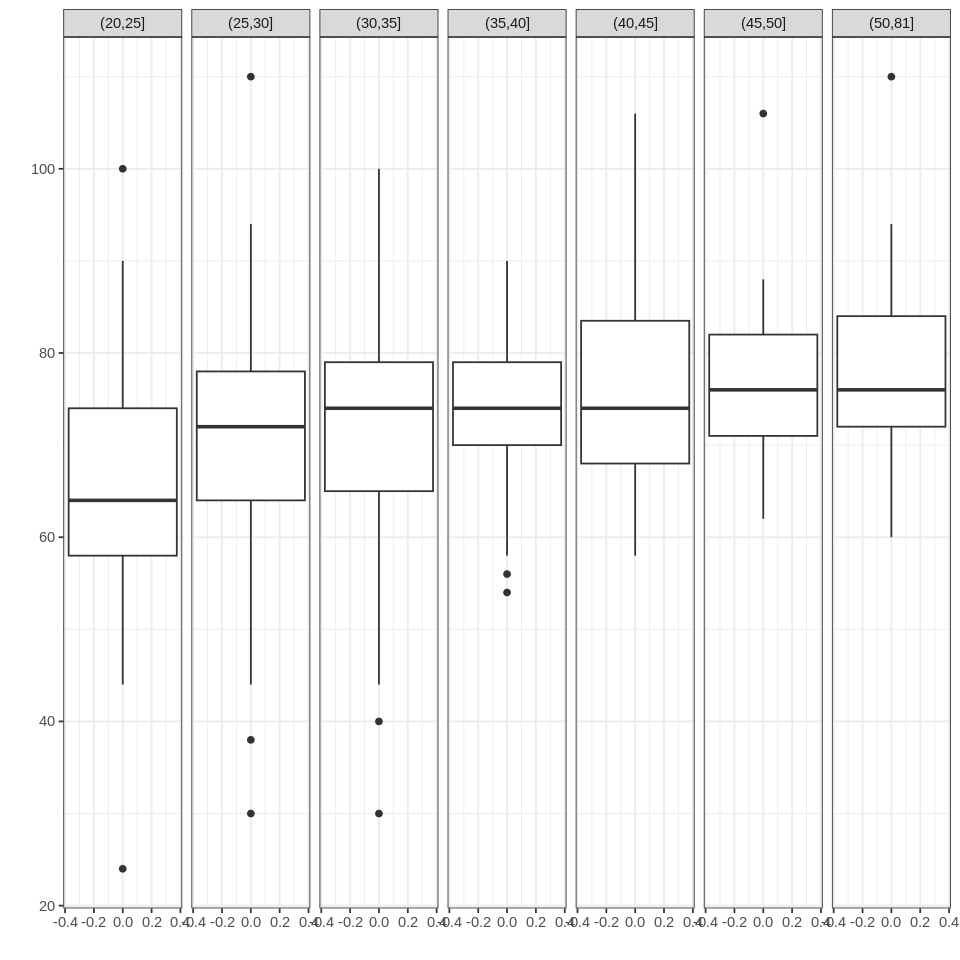

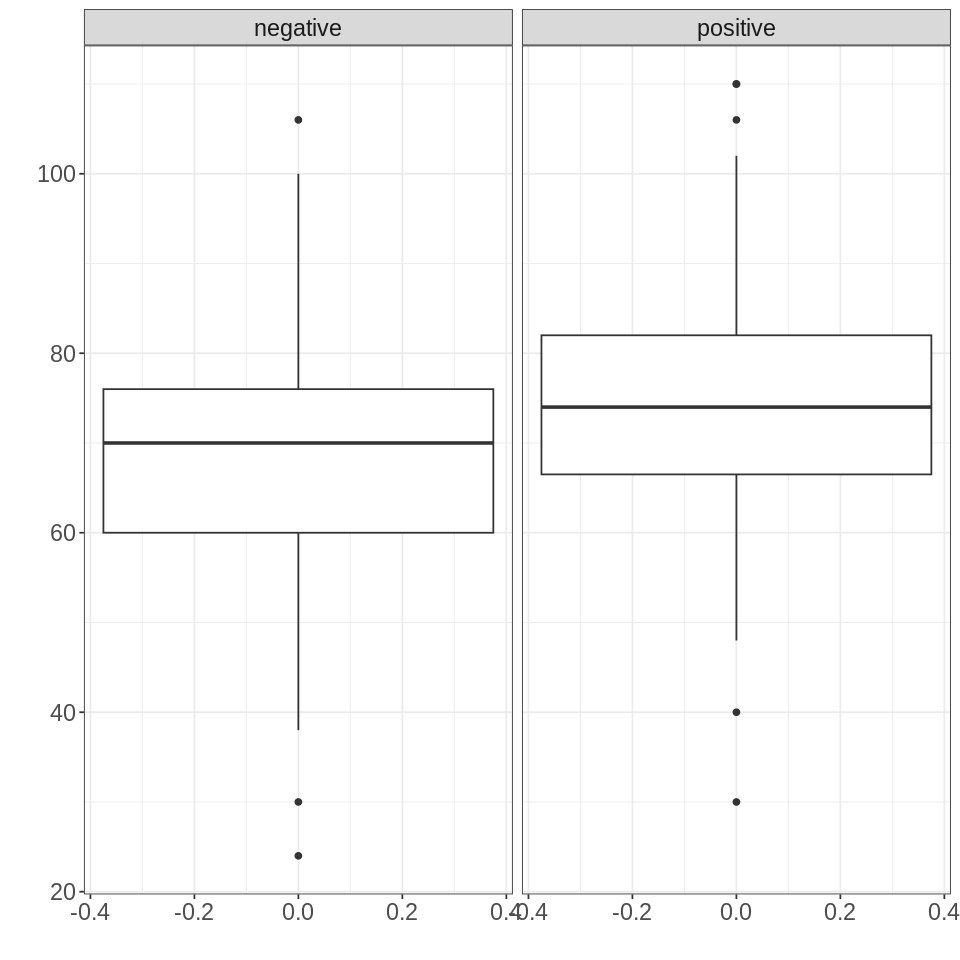

In [ ]:
ggplot(data = pima2, aes(y = diastolic))  + geom_boxplot()+
  labs(x = '', y = '', fill = '') + theme_bw() +
  facet_wrap(~age2, nrow = 1)
  ggplot(data = pima2, aes(y = diastolic))  + geom_boxplot()+
  labs(x = '', y = '', fill = '') + theme_bw() +
  facet_wrap(~test, nrow = 1) +
theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none') 

## Looking at Relationships

### Categorical Data, Counts, and Charts

In [ ]:
with(pima2, addmargins(prop.table(table(age2,test))))

,negative,positive,Sum
"(20,25]",0.35714286,0.06377551,0.42091837
"(25,30]",0.14540816,0.06632653,0.21173469
"(30,35]",0.05357143,0.05612245,0.10969388
"(35,40]",0.04591837,0.03316327,0.07908163
"(40,45]",0.02551020,0.04081633,0.06632653
"(45,50]",0.02040816,0.02040816,0.04081633
"(50,81]",0.02040816,0.05102041,0.07142857
Sum,0.66836735,0.33163265,1.00000000


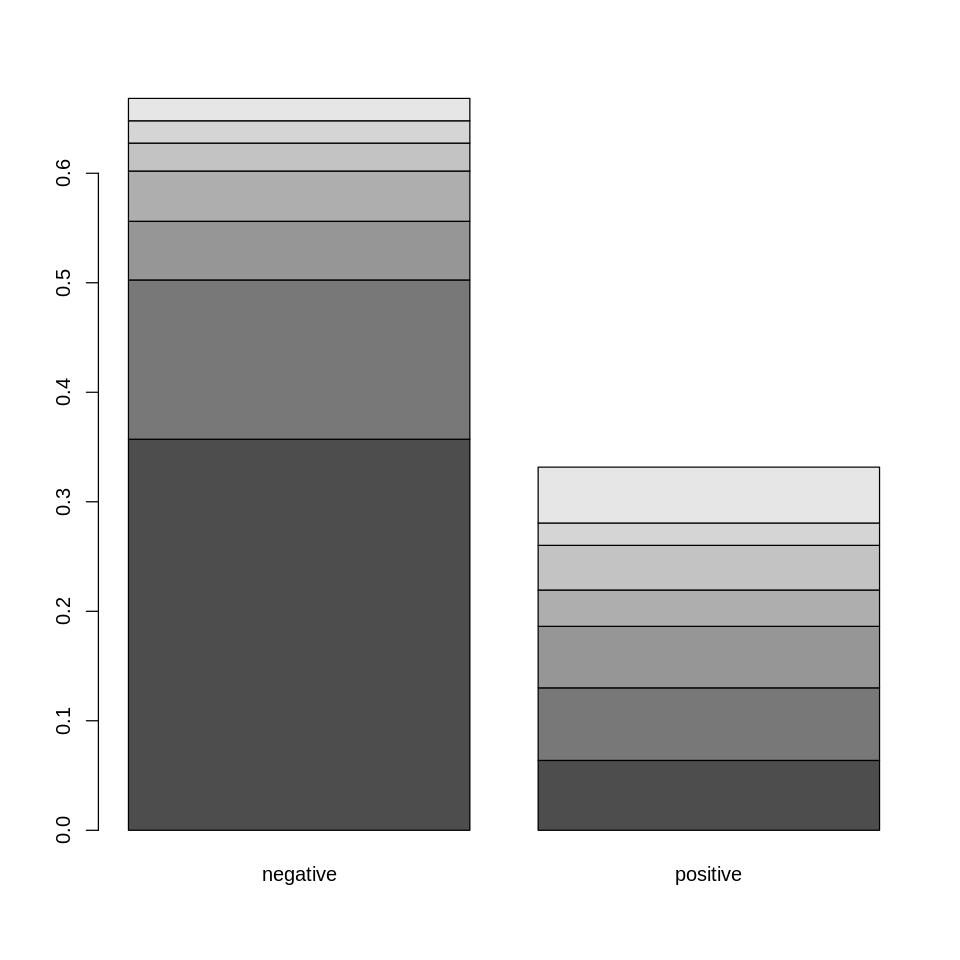

In [ ]:
tabla <- with(pima2, prop.table(table(age2,test)))
barplot(tabla)

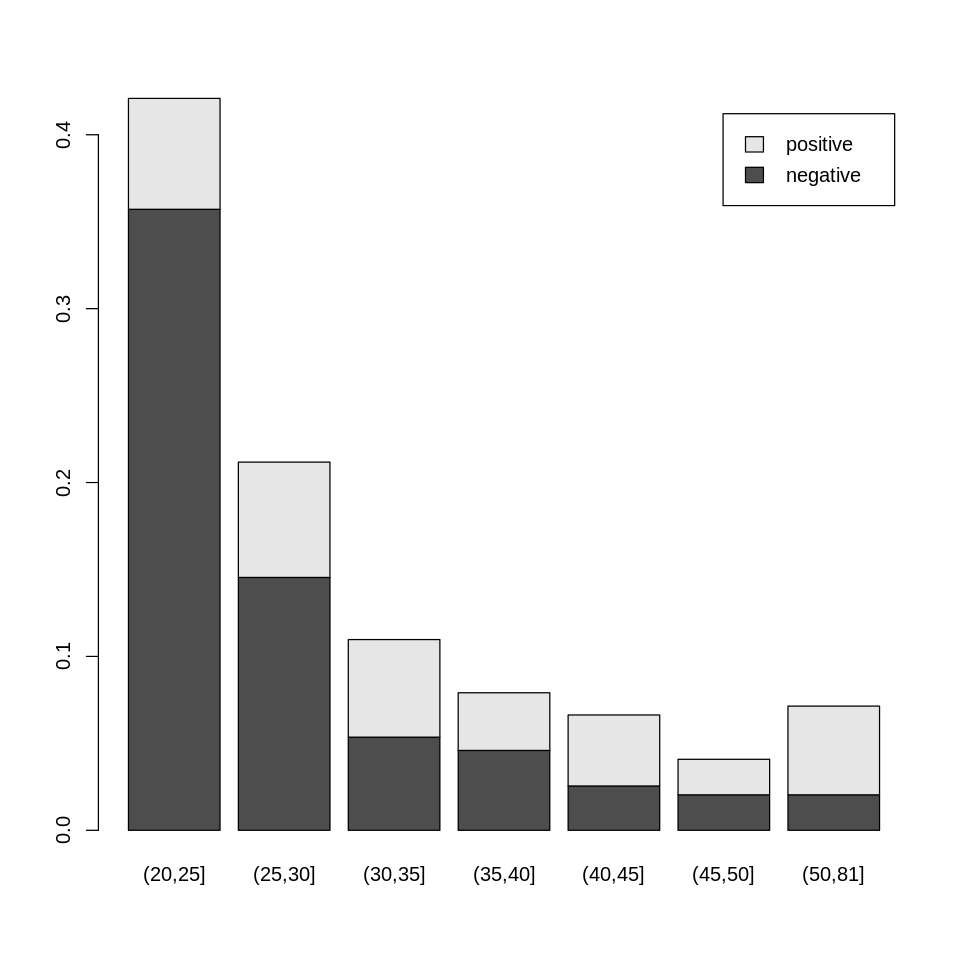

In [ ]:
barplot(t(tabla), legend=colnames(tabla))

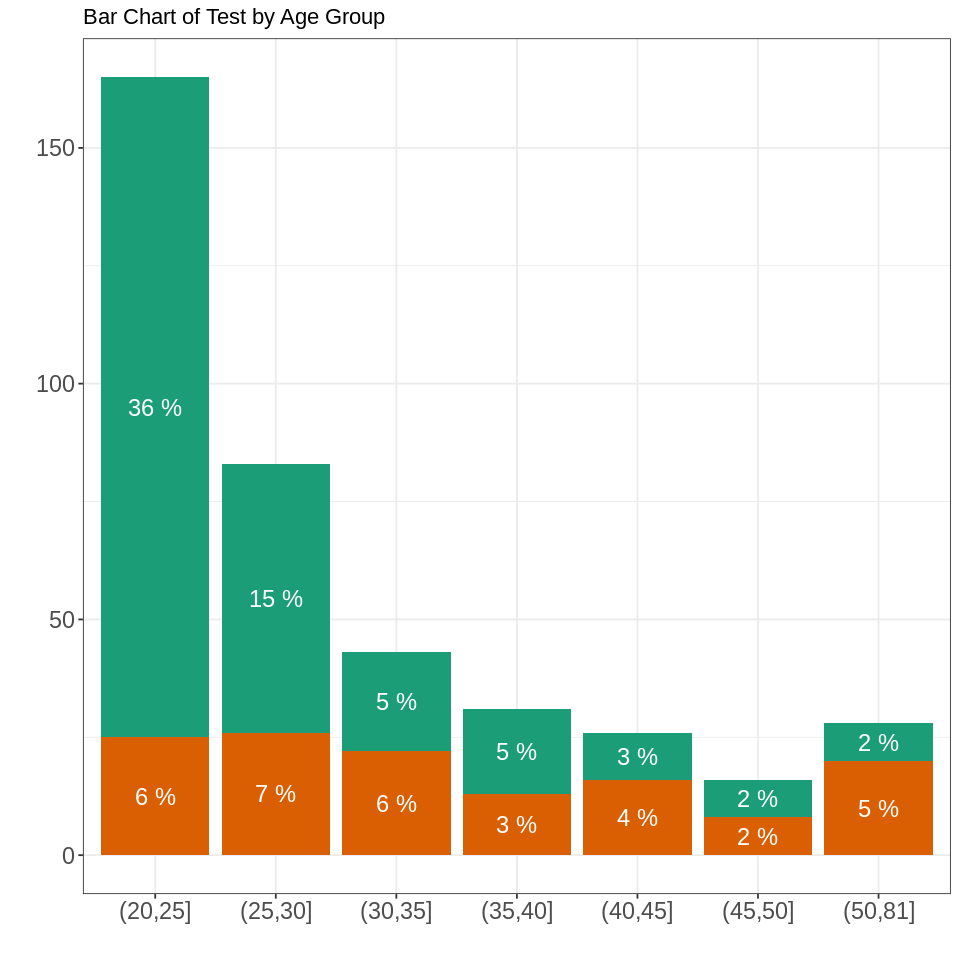

In [ ]:
age_tab_2 <- data.frame(table(pima2$age2,pima2$test))

ggplot(data = age_tab_2, aes(x = Var1, y = Freq, fill = Var2)) +
  geom_bar(stat = 'identity') + theme_bw() +
  scale_fill_brewer(palette="Dark2") + 
  geom_text(data = age_tab_2, aes(label = paste(round(Freq/sum(Freq)*100,0),'%')), col = 'white',
  position = position_stack(vjust = 0.5), size = 5) +
  labs(x = '', y = '', fill = 'Test\nSigns\nof Diabetes') +
  ggtitle('Bar Chart of Test by Age Group') +
theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none') 


## Exposing Relationships with Scatter Plots

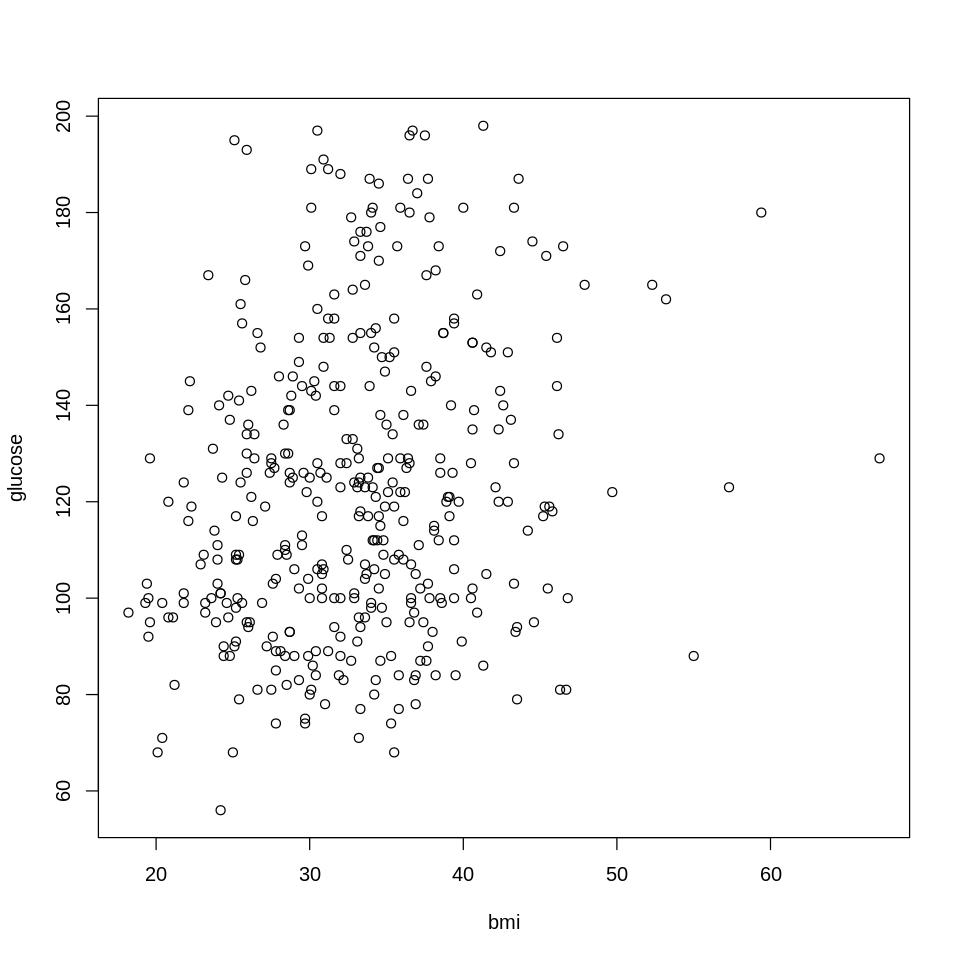

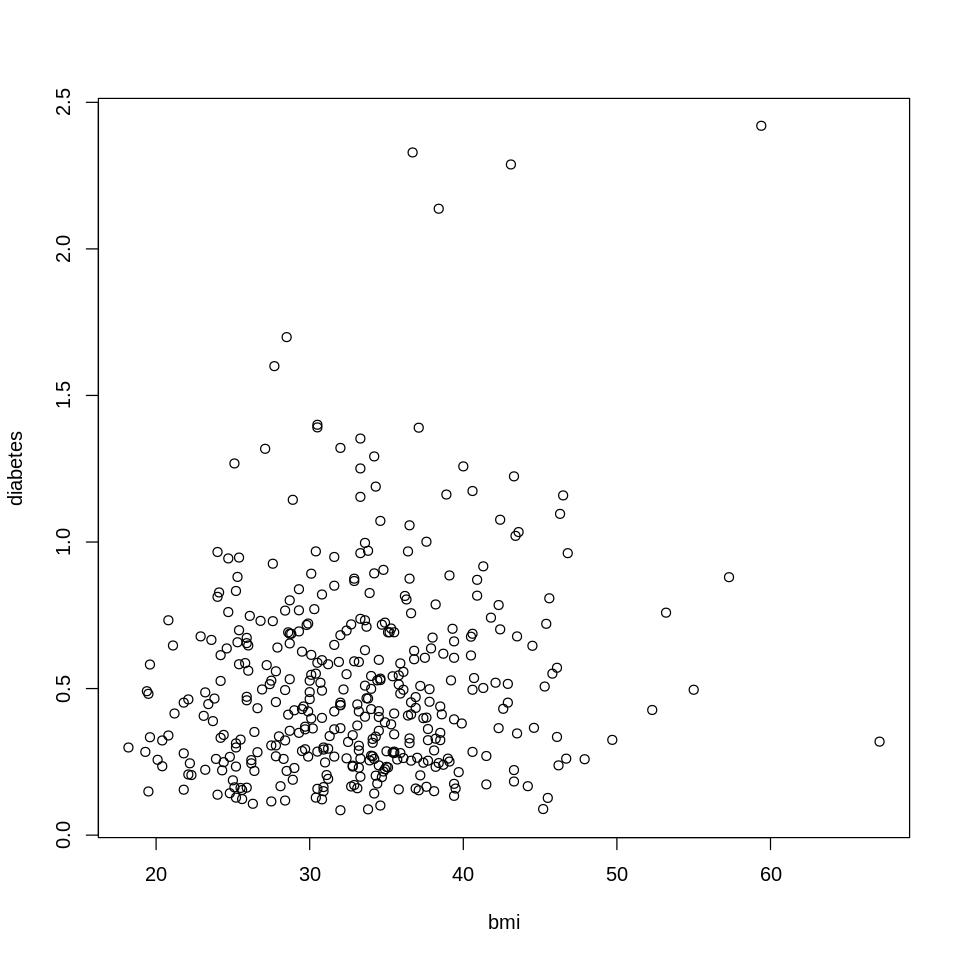

In [ ]:
# Using plot
with(pima2, plot(bmi,glucose))
with(pima2, plot(bmi,diabetes))

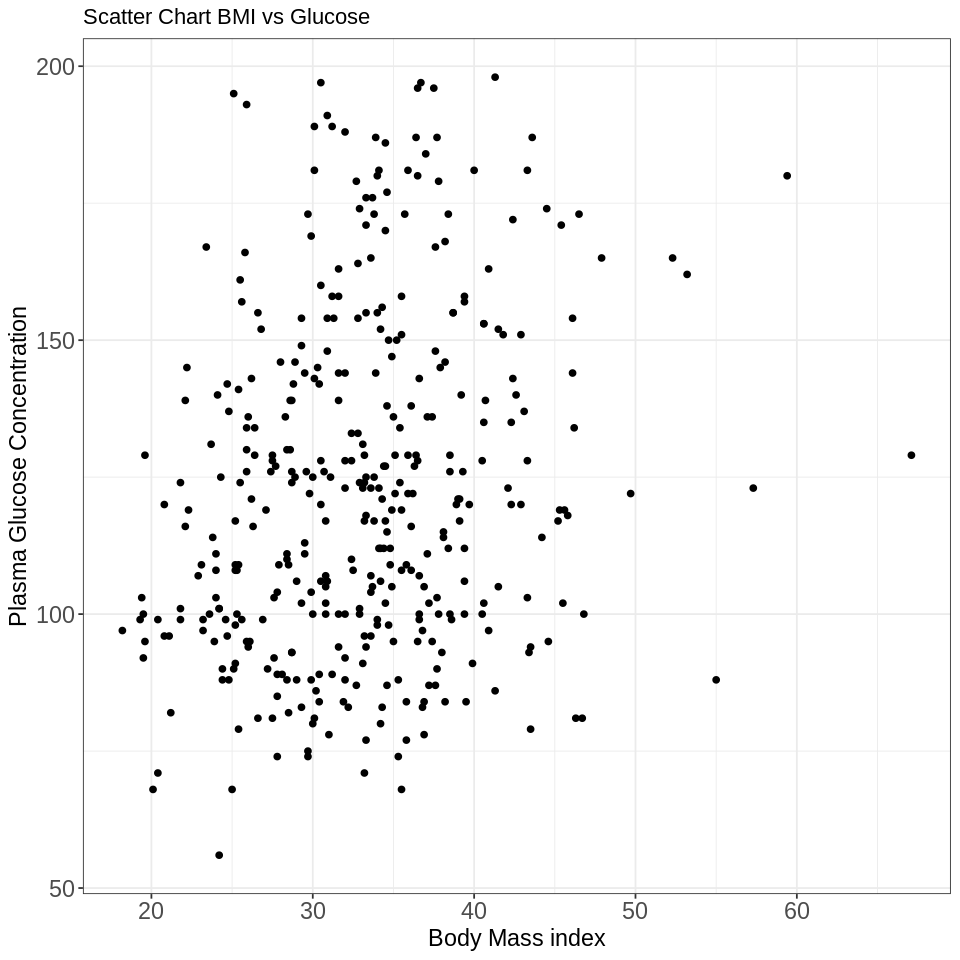

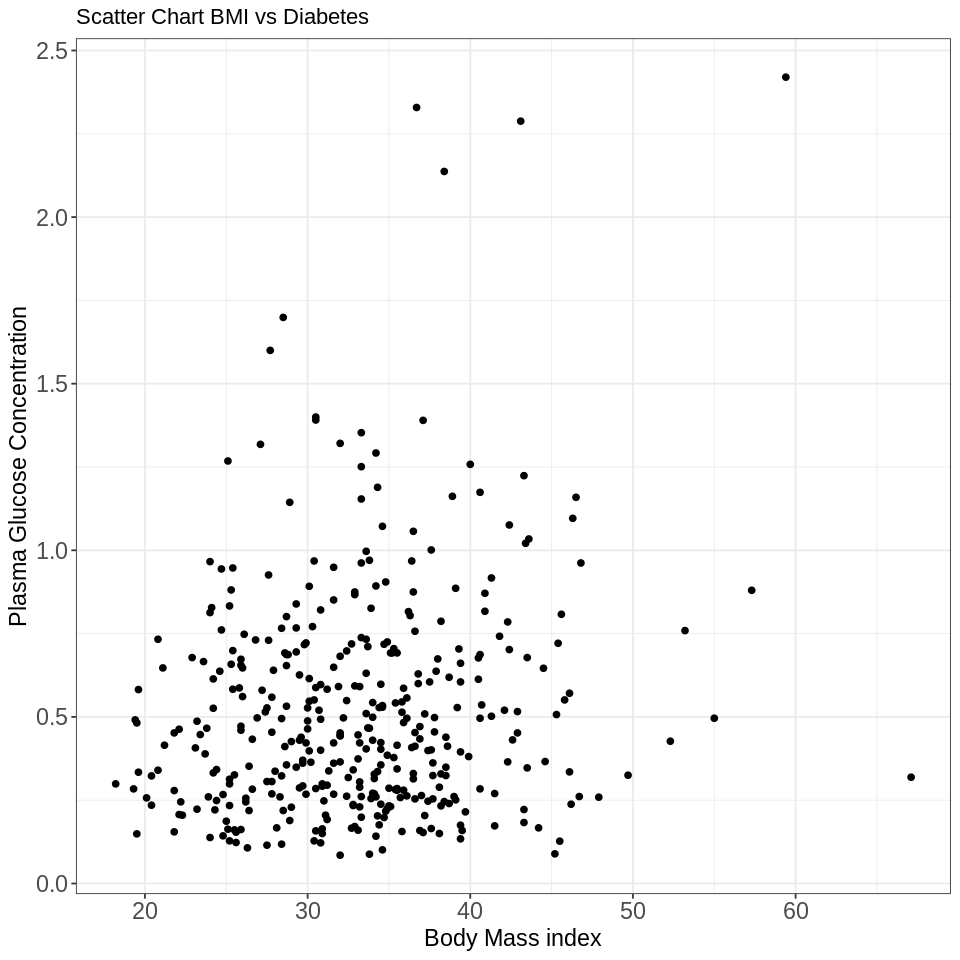

In [ ]:
# using ggplot2
ggplot(data = pima2, aes(x = bmi, y = glucose)) + geom_point()+
  labs(x = 'Body Mass index',
       y = 'Plasma Glucose Concentration') +
  ggtitle('Scatter Chart BMI vs Glucose') + theme_bw() +
theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none') 

  ggplot(data = pima2, aes(x = bmi, y = diabetes)) + geom_point()+
  labs(x = 'Body Mass index',
       y = 'Plasma Glucose Concentration') +
  ggtitle('Scatter Chart BMI vs Diabetes') + theme_bw() +
theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none') 

## Correlation

In [ ]:
head(pima2)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test,age2
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>,<fct>
4,1,89,66,23,94,28.1,0.167,21,negative,"(20,25]"
5,0,137,40,35,168,43.1,2.288,33,positive,"(30,35]"
7,3,78,50,32,88,31.0,0.248,26,positive,"(25,30]"
9,2,197,70,45,543,30.5,0.158,53,positive,"(50,81]"
14,1,189,60,23,846,30.1,0.398,59,positive,"(50,81]"
15,5,166,72,19,175,25.8,0.587,51,positive,"(50,81]"


In [ ]:
cor(pima2[,2:7])

,glucose,diastolic,triceps,insulin,bmi,diabetes
glucose,1.0000000,0.2100266,0.1988558,0.5812230,0.2095159,0.1401802
diastolic,0.2100266,1.0000000,0.2325712,0.0985115,0.3044034,-0.0159711
triceps,0.1988558,0.2325712,1.0000000,0.1821991,0.6643549,0.1604985
insulin,0.5812230,0.0985115,0.1821991,1.0000000,0.2263965,0.1359058
bmi,0.2095159,0.3044034,0.6643549,0.2263965,1.0000000,0.1587710
diabetes,0.1401802,-0.0159711,0.1604985,0.1359058,0.1587710,1.0000000


In [ ]:
library(ggpubr)

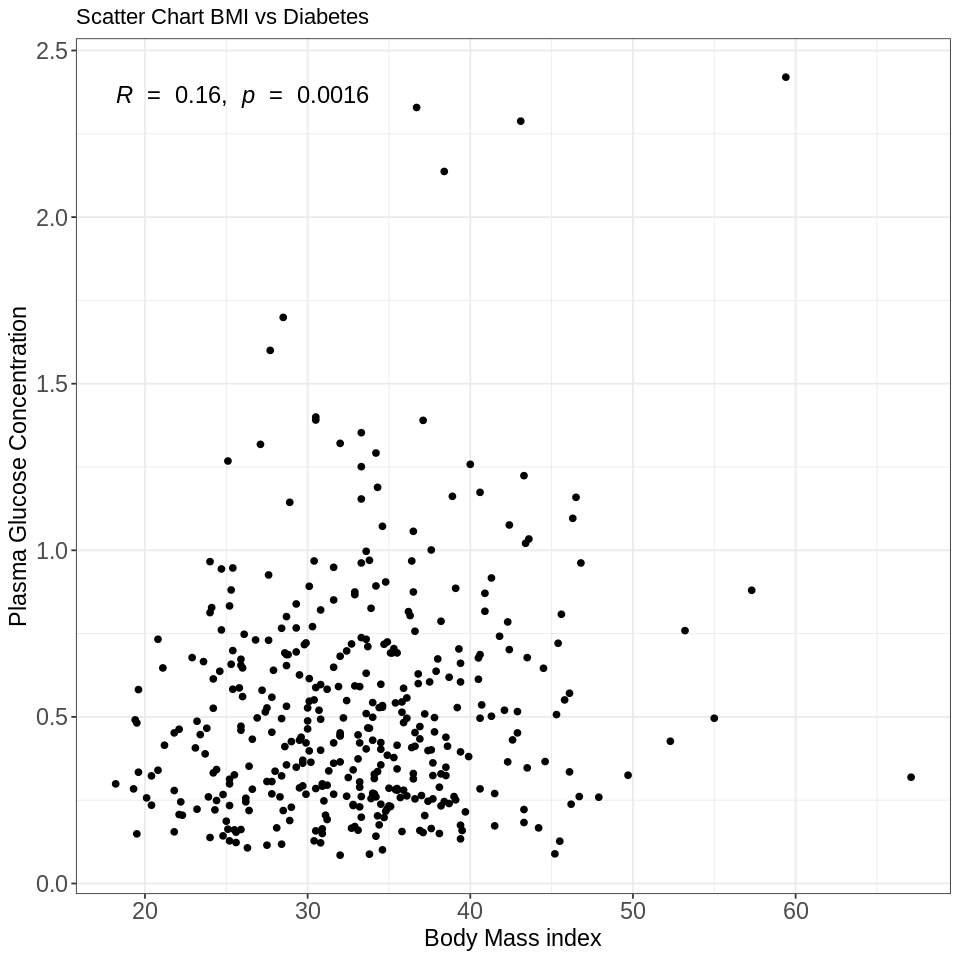

In [ ]:
ggplot(data = pima2, aes(x = bmi, y = diabetes)) + geom_point()+
  labs(x = 'Body Mass index',
       y = 'Plasma Glucose Concentration') +
  stat_cor(method = "pearson", size = 5) +
  ggtitle('Scatter Chart BMI vs Diabetes') + theme_bw() +
theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none') 

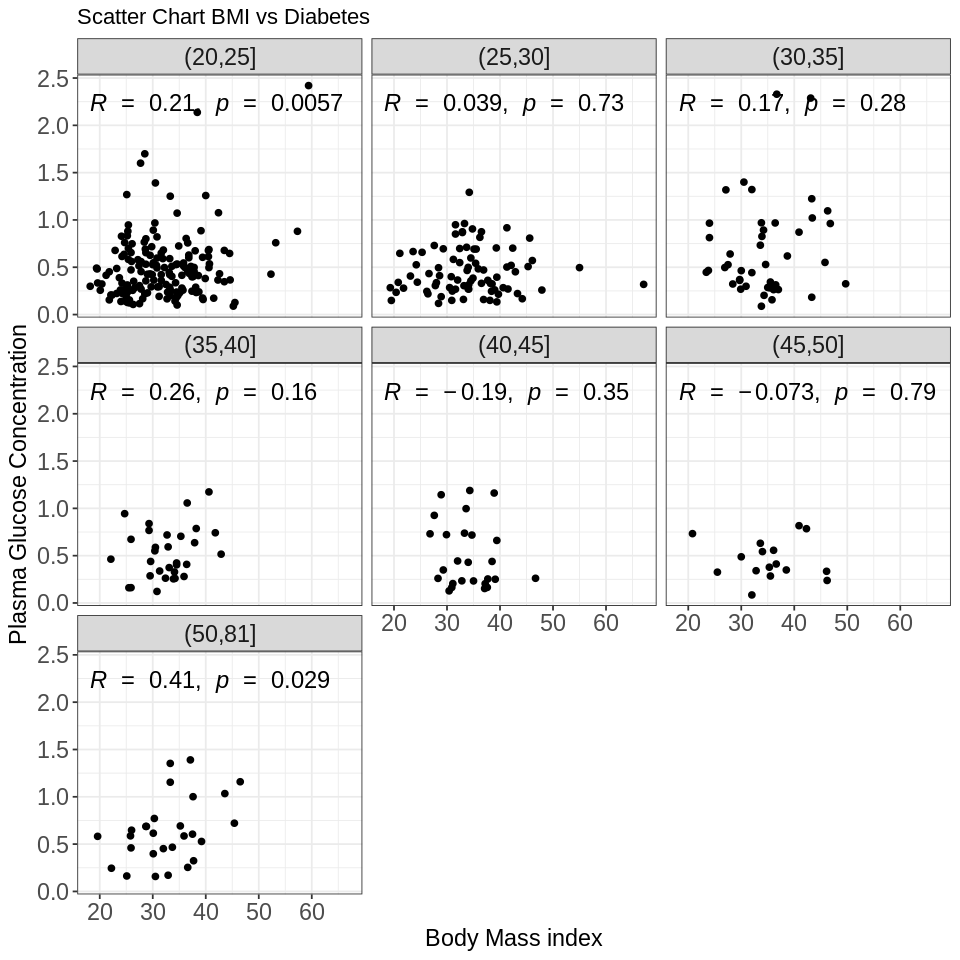

In [ ]:
ggplot(data = pima2, aes(x = bmi, y = diabetes)) + geom_point()+
  labs(x = 'Body Mass index',
       y = 'Plasma Glucose Concentration') +
  stat_cor(method = "pearson", size = 5) + facet_wrap(~age2) +
  ggtitle('Scatter Chart BMI vs Diabetes') + theme_bw() +
theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none') 

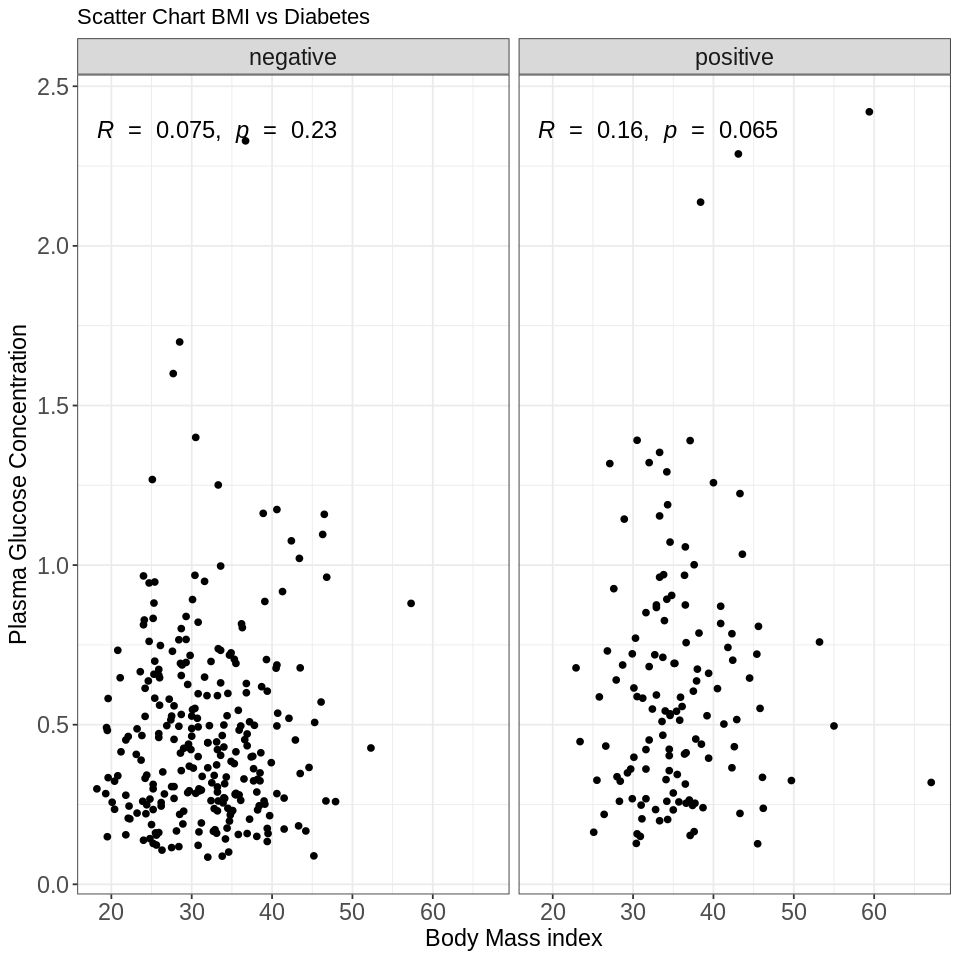

In [ ]:
ggplot(data = pima2, aes(x = bmi, y = diabetes)) + geom_point()+
  labs(x = 'Body Mass index',
       y = 'Plasma Glucose Concentration') +
  stat_cor(method = "pearson", size = 5) + facet_wrap(~test) +
  ggtitle('Scatter Chart BMI vs Diabetes') + theme_bw() +
theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none') 